In [401]:
# Load packages

import numpy as np
import pandas as pd
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier


In [402]:
# Disable the warnings
import warnings
warnings.filterwarnings('ignore')

In [403]:
import yfinance as yf

# Define the ticker symbol for Ethereum in USD
ticker = 'ETH-USD'

# Download historical data (daily interval) for the specified period
dataset = yf.download(ticker, start='2015-01-01', end='2024-10-20', interval='1d')

# Show the first few rows of the data
print(dataset.head())

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                        ETH-USD     ETH-USD     ETH-USD     ETH-USD   
Date                                                                        
2017-11-09 00:00:00+00:00  320.884003  320.884003  329.451996  307.056000   
2017-11-10 00:00:00+00:00  299.252991  299.252991  324.717987  294.541992   
2017-11-11 00:00:00+00:00  314.681000  314.681000  319.453003  298.191986   
2017-11-12 00:00:00+00:00  307.907990  307.907990  319.153015  298.513000   
2017-11-13 00:00:00+00:00  316.716003  316.716003  328.415009  307.024994   

Price                            Open      Volume  
Ticker                        ETH-USD     ETH-USD  
Date                                               
2017-11-09 00:00:00+00:00  308.644989   893249984  
2017-11-10 00:00:00+00:00  320.670990   885985984  
2017-11-11 00:00:00+00:00  298.585999   842300992  
2017-11-12 00:00:00+00:00  314.690002  1613479936  
2017-11-13 00:00:00

In [404]:
# Reset index to make Date a regular column, if it’s not already
dataset.reset_index(inplace=True)
dataset

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
0,2017-11-09 00:00:00+00:00,320.884003,320.884003,329.451996,307.056000,308.644989,893249984
1,2017-11-10 00:00:00+00:00,299.252991,299.252991,324.717987,294.541992,320.670990,885985984
2,2017-11-11 00:00:00+00:00,314.681000,314.681000,319.453003,298.191986,298.585999,842300992
3,2017-11-12 00:00:00+00:00,307.907990,307.907990,319.153015,298.513000,314.690002,1613479936
4,2017-11-13 00:00:00+00:00,316.716003,316.716003,328.415009,307.024994,307.024994,1041889984
...,...,...,...,...,...,...,...
2532,2024-10-15 00:00:00+00:00,2606.021973,2606.021973,2685.166748,2537.940918,2629.017578,22003780898
2533,2024-10-16 00:00:00+00:00,2611.102051,2611.102051,2644.854248,2589.606934,2606.019531,17012396419
2534,2024-10-17 00:00:00+00:00,2604.273438,2604.273438,2646.874023,2577.305908,2611.192139,15150712321


In [405]:
# Flatten multi-level columns
dataset.columns = ['_'.join(col).strip() for col in dataset.columns.values]


In [406]:
# Reset index to make Date a regular column, if it’s not already
dataset.reset_index(inplace=True)


In [407]:
# Save to CSV
dataset.to_csv('eth_cleaned_data.csv', index=False)


In [408]:
# dataset.drop(columns=['level_0', 'index', 'index_'], inplace=True)

In [409]:
dataset.shape

(2537, 8)

In [410]:
dataset.describe()

,index,Adj Close_ETH-USD,Close_ETH-USD,High_ETH-USD,Low_ETH-USD,Open_ETH-USD,Volume_ETH-USD
count,2537.00000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2.537000e+03
mean,1268.00000,1440.860284,1440.860284,1479.441267,1396.793582,1440.119316,1.246581e+10
std,732.51314,1203.947167,1203.947167,1236.033668,1168.217939,1204.226406,9.927912e+09
min,0.00000,84.308296,84.308296,85.342743,82.829887,84.279694,6.217330e+08
25%,634.00000,259.763977,259.763977,266.871246,246.858994,259.819855,5.396998e+09
50%,1268.00000,1295.688599,1295.688599,1335.662720,1262.271118,1294.917358,1.031782e+10
75%,1902.00000,2297.292969,2297.292969,2352.327881,2214.263184,2298.367188,1.696470e+10
max,2536.00000,4812.087402,4812.087402,4891.704590,4718.039062,4810.071289,8.448291e+10


In [411]:
print(dataset.isnull().sum())

index                0
Date_                0
Adj Close_ETH-USD    0
Close_ETH-USD        0
High_ETH-USD         0
Low_ETH-USD          0
Open_ETH-USD         0
Volume_ETH-USD       0
dtype: int64


In [412]:
dataset

,index,Date_,Adj Close_ETH-USD,Close_ETH-USD,High_ETH-USD,Low_ETH-USD,Open_ETH-USD,Volume_ETH-USD
0,0,2017-11-09 00:00:00+00:00,320.884003,320.884003,329.451996,307.056000,308.644989,893249984
1,1,2017-11-10 00:00:00+00:00,299.252991,299.252991,324.717987,294.541992,320.670990,885985984
2,2,2017-11-11 00:00:00+00:00,314.681000,314.681000,319.453003,298.191986,298.585999,842300992
3,3,2017-11-12 00:00:00+00:00,307.907990,307.907990,319.153015,298.513000,314.690002,1613479936
4,4,2017-11-13 00:00:00+00:00,316.716003,316.716003,328.415009,307.024994,307.024994,1041889984
...,...,...,...,...,...,...,...,...
2532,2532,2024-10-15 00:00:00+00:00,2606.021973,2606.021973,2685.166748,2537.940918,2629.017578,22003780898
2533,2533,2024-10-16 00:00:00+00:00,2611.102051,2611.102051,2644.854248,2589.606934,2606.019531,17012396419
2534,2534,2024-10-17 00:00:00+00:00,2604.273438,2604.273438,2646.874023,2577.305908,2611.192139,15150712321
2535,2535,2024-10-18 00:00:00+00:00,2641.552246,2641.552246,2674.371826,2595.958984,2604.814453,17043738652


In [413]:
dataset.columns = dataset.columns.str.replace('_', '', regex=False)
dataset.columns = dataset.columns.str.replace('-', '', regex=False)
dataset.columns = dataset.columns.str.replace('ETHUSD', '', regex=False)

In [414]:
dataset = dataset.dropna(axis=0)

In [415]:
# Make sure Date is the index before plotting
dataset.set_index('Date', inplace=True)

In [416]:
dataset.drop(columns="Adj Close", inplace=True)
dataset.drop(columns="index", inplace=True)

In [417]:
# Printing the start date and End date of the dataset

sd=dataset.index[0]
ed=dataset.index[-1]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2017-11-09 00:00:00+00:00
Ending Date 2024-10-19 00:00:00+00:00


In [418]:
# remove time from the data
dataset.index = pd.to_datetime(dataset.index).date

# Now, the time part is removed from the index
print(dataset.index)

Index([2017-11-09, 2017-11-10, 2017-11-11, 2017-11-12, 2017-11-13, 2017-11-14,
       2017-11-15, 2017-11-16, 2017-11-17, 2017-11-18,
       ...
       2024-10-10, 2024-10-11, 2024-10-12, 2024-10-13, 2024-10-14, 2024-10-15,
       2024-10-16, 2024-10-17, 2024-10-18, 2024-10-19],
      dtype='object', length=2537)


In [419]:
dataset.head()


,Close,High,Low,Open,Volume
2017-11-09,320.884003,329.451996,307.056000,308.644989,893249984
2017-11-10,299.252991,324.717987,294.541992,320.670990,885985984
2017-11-11,314.681000,319.453003,298.191986,298.585999,842300992
2017-11-12,307.907990,319.153015,298.513000,314.690002,1613479936
2017-11-13,316.716003,328.415009,307.024994,307.024994,1041889984


In [420]:
dataset.info

<bound method DataFrame.info of                   Close         High          Low         Open       Volume
2017-11-09   320.884003   329.451996   307.056000   308.644989    893249984
2017-11-10   299.252991   324.717987   294.541992   320.670990    885985984
2017-11-11   314.681000   319.453003   298.191986   298.585999    842300992
2017-11-12   307.907990   319.153015   298.513000   314.690002   1613479936
2017-11-13   316.716003   328.415009   307.024994   307.024994   1041889984
...                 ...          ...          ...          ...          ...
2024-10-15  2606.021973  2685.166748  2537.940918  2629.017578  22003780898
2024-10-16  2611.102051  2644.854248  2589.606934  2606.019531  17012396419
2024-10-17  2604.273438  2646.874023  2577.305908  2611.192139  15150712321
2024-10-18  2641.552246  2674.371826  2595.958984  2604.814453  17043738652
2024-10-19  2648.656982  2661.872803  2631.656982  2641.488281   8557834553

[2537 rows x 5 columns]>

In [421]:
dataset.describe

<bound method NDFrame.describe of                   Close         High          Low         Open       Volume
2017-11-09   320.884003   329.451996   307.056000   308.644989    893249984
2017-11-10   299.252991   324.717987   294.541992   320.670990    885985984
2017-11-11   314.681000   319.453003   298.191986   298.585999    842300992
2017-11-12   307.907990   319.153015   298.513000   314.690002   1613479936
2017-11-13   316.716003   328.415009   307.024994   307.024994   1041889984
...                 ...          ...          ...          ...          ...
2024-10-15  2606.021973  2685.166748  2537.940918  2629.017578  22003780898
2024-10-16  2611.102051  2644.854248  2589.606934  2606.019531  17012396419
2024-10-17  2604.273438  2646.874023  2577.305908  2611.192139  15150712321
2024-10-18  2641.552246  2674.371826  2595.958984  2604.814453  17043738652
2024-10-19  2648.656982  2661.872803  2631.656982  2641.488281   8557834553

[2537 rows x 5 columns]>

# **Preprocessing the data** 

# Adding the indicators

In [422]:
# making the exponential moving average
# first making the function to calculate the exponential MA of the Close column & then convert into a series

def EMA(df,n):
    EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA

dataset['EMA10'] = EMA(dataset, 10)
dataset['EMA30']= EMA(dataset, 30)
dataset['EMA200'] = EMA (dataset, 200)
dataset.tail()

,Close,High,Low,Open,Volume,EMA10,EMA30,EMA200
2024-10-15,2606.021973,2685.166748,2537.940918,2629.017578,22003780898,2501.555549,2494.187525,2806.440441
2024-10-16,2611.102051,2644.854248,2589.606934,2606.019531,17012396419,2521.473095,2501.730397,2804.496776
2024-10-17,2604.273438,2646.874023,2577.305908,2611.192139,15150712321,2536.527703,2508.346077,2802.504503
2024-10-18,2641.552246,2674.371826,2595.958984,2604.814453,17043738652,2555.623074,2516.940024,2800.902988
2024-10-19,2648.656982,2661.872803,2631.656982,2641.488281,8557834553,2572.538330,2525.437892,2799.388103


In [423]:
# Compact calculation of Rate of Change
dataset['ROC10'] = dataset['Close'].pct_change(10) * 100
dataset['ROC30'] = dataset['Close'].pct_change(30) * 100

In [424]:
# Compute the momentum

dataset['MOM10'] = dataset['Close'].diff(10)
dataset['MOM30'] = dataset['Close'].diff(30)

In [425]:
# compute the Relative strength index
import talib

dataset['RSI10'] = talib.RSI(dataset['Close'], timeperiod=10)
dataset['RSI30'] = talib.RSI(dataset['Close'], timeperiod=30)
dataset['RSI200'] = talib.RSI(dataset['Close'], timeperiod=200)

In [426]:
#calculation of stochastic osillator.

def STOK(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 STOD = STOK.rolling(3).mean()
 return STOD

dataset['%K10'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 10)
dataset['%D10'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 10)
dataset['%K30'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 30)
dataset['%D30'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 30)
dataset['%K200'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 200)
dataset['%D200'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 200)

In [427]:
#Calculation of moving average
def MA(df, n):
    MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA
dataset['MA21'] = MA(dataset, 10)
dataset['MA63'] = MA(dataset, 30)
dataset['MA252'] = MA(dataset, 200)

In [428]:
# Create rolling averages for key features
dataset['%K10_avg'] = dataset['%K10'].rolling(window=5).mean()  # Average of %K10 over 5 timesteps
dataset['%D10_avg'] = dataset['%D10'].rolling(window=5).mean()  # Average of %D10 over 5 timesteps
dataset['MOM10_avg'] = dataset['MOM10'].rolling(window=5).mean()  # Average of MOM10 over 5 timesteps
dataset['Volume_avg'] = dataset['Volume'].rolling(window=5).mean()  # Average of Volume over 5 timesteps

# Drop NaN values introduced by rolling averages
dataset = dataset.dropna()

In [429]:
# Aggregated Stochastic Indicators
dataset['%K10_avg'] = dataset['%K10'].rolling(window=5).mean()
dataset['%D10_avg'] = dataset['%D10'].rolling(window=5).mean()

# Aggregated Momentum Indicators
dataset['MOM10_avg'] = dataset['MOM10'].rolling(window=5).mean()
dataset['ROC10_avg'] = dataset['ROC10'].rolling(window=5).mean()

# Drop NaNs created by rolling calculations
dataset = dataset.dropna()

In [430]:
# Drop rows with NaNs
dataset.dropna(inplace=True)

# Verify no more NaNs
print(dataset.isnull().sum())

Close         0
High          0
Low           0
Open          0
Volume        0
EMA10         0
EMA30         0
EMA200        0
ROC10         0
ROC30         0
MOM10         0
MOM30         0
RSI10         0
RSI30         0
RSI200        0
%K10          0
%D10          0
%K30          0
%D30          0
%K200         0
%D200         0
MA21          0
MA63          0
MA252         0
%K10_avg      0
%D10_avg      0
MOM10_avg     0
Volume_avg    0
ROC10_avg     0
dtype: int64


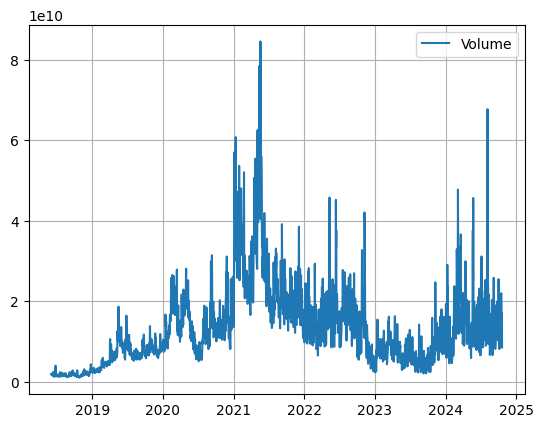

In [431]:
# Plot with Date on the x-axis
dataset[['Volume']].plot(grid=True)
plt.show()

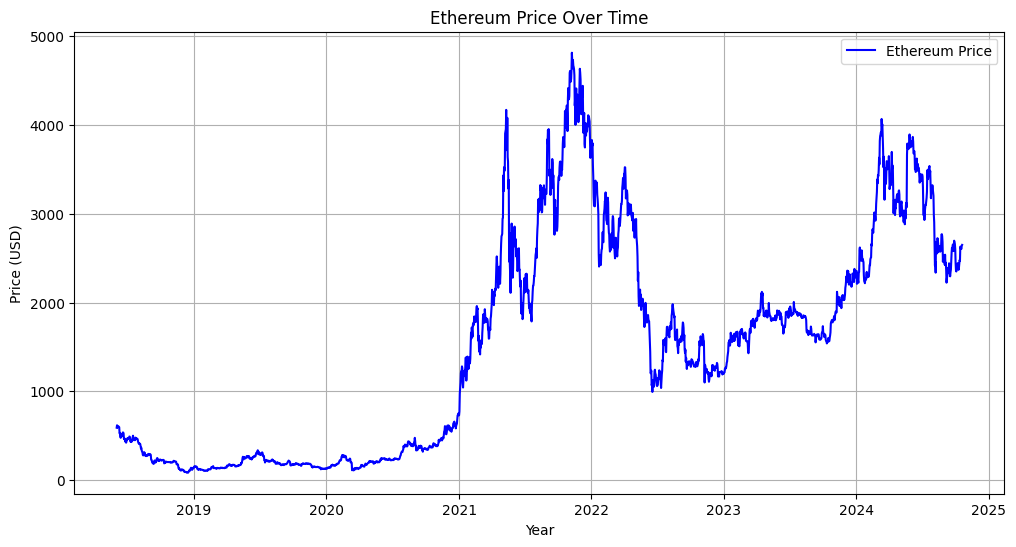

In [432]:
# Select the relevant column for plotting
eth_prices = dataset[['Close']]

import matplotlib.pyplot as plt

# Plot the Ethereum price
plt.figure(figsize=(12, 6))
plt.plot(eth_prices, label='Ethereum Price', color='blue')
plt.title('Ethereum Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


# Models and algorithms

# LSTM model

In [433]:
dataset['signal'] = (dataset['Close'].shift(-1) > dataset['Close']).astype(int)

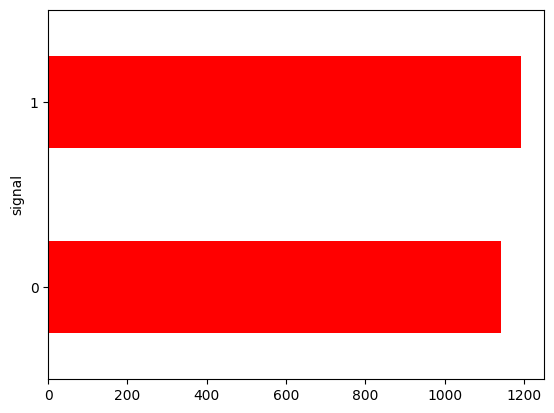

In [434]:
fig = plt.figure()
plot = dataset.groupby(['signal']).size().plot(kind='barh', color='red')
plt.show()

## Scale and train

In [435]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [436]:
# Columns to keep for scaling
columns_to_scale = [
    'Open', 'High', 'Low', 'Close', 'Volume',
    'EMA10',
    'ROC10', 'MOM10',
    'RSI10',
    '%K10', '%D10'
]

# Filter the dataset
features_to_scale = dataset[columns_to_scale]


In [437]:
# Scale the features
scaled_features = scaler.fit_transform(features_to_scale)

# Convert back to a DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=columns_to_scale)

# Add the signal column (unchanged)
scaled_data['signal'] = dataset['signal'].values


In [438]:
# Check the first few rows
print(scaled_data.tail())

# Verify the range of the scaled columns
print(scaled_data.describe())


          Open      High       Low     Close    Volume     EMA10     ROC10  \
2327  0.538479  0.540913  0.529666  0.533382  0.250833  0.532133  0.475326   
2328  0.533612  0.532526  0.540812  0.534457  0.190983  0.536529  0.468726   
2329  0.534707  0.532946  0.538158  0.533012  0.168660  0.539851  0.472687   
2330  0.533357  0.538667  0.542182  0.540898  0.191358  0.544066  0.478262   
2331  0.541118  0.536067  0.549884  0.542400  0.089607  0.547799  0.505438   

         MOM10     RSI10      %K10      %D10  signal  
2327  0.651315  0.631025  0.777297  0.808844       1  
2328  0.644815  0.636094  0.791591  0.832353       0  
2329  0.648642  0.623316  0.772377  0.779483       1  
2330  0.655138  0.665067  0.877274  0.813941       1  
2331  0.681705  0.672950  0.897266  0.850363       0  
              Open         High          Low        Close       Volume  \
count  2332.000000  2332.000000  2332.000000  2332.000000  2332.000000   
mean      0.300686     0.303749     0.297387     0.30

## Sequence length

In [439]:
sequence_length = 32

In [440]:
import numpy as np

# Initialize empty lists for sequences and targets
X = []
y = []

# Create sequences
for i in range(sequence_length, len(scaled_data)):
    # Extract sequence of past 30 days (all columns except 'signal')
    X.append(scaled_data.iloc[i-sequence_length:i, :-1].values)
    # Target is the 'signal' for the current day
    y.append(scaled_data.iloc[i, -1])  # 'signal' column

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Check the shapes
print("X shape:", X.shape)  # (number of samples, sequence_length, number of features)
print("y shape:", y.shape)  # (number of samples,)


X shape: (2300, 32, 11)
y shape: (2300,)


In [441]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Check the shapes
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (1840, 32, 11) (1840,)
Testing data shape: (460, 32, 11) (460,)


In [442]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


## Model

In [443]:
# Initialize the model
model = Sequential()

# First LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(Dropout(0.2))  # Add dropout to reduce overfitting

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
#model.add(Dropout(0.2))

#model.add(BatchNormalization())

# Dense output layer (binary classification)
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification


In [444]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 32, 50)         │        12,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,651 (127.54 KB)

 Trainable params: 32,651 (127.54 KB)

 Non-trainable params: 0 (0.00 B)

In [445]:
history = model.fit(
    X_train, y_train,
    epochs=50,  # Number of training iterations
    batch_size=32,  # Number of samples per training batch
    validation_data=(X_test, y_test)  # Validation set
)


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4896 - loss: 0.6999 - val_accuracy: 0.4783 - val_loss: 0.7015
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5105 - loss: 0.6953 - val_accuracy: 0.4783 - val_loss: 0.6990
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4772 - loss: 0.6980 - val_accuracy: 0.4783 - val_loss: 0.6971
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4776 - loss: 0.6964 - val_accuracy: 0.4783 - val_loss: 0.6957
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4960 - loss: 0.6940 - val_accuracy: 0.4783 - val_loss: 0.6948
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5110 - loss: 0.6930 - val_accuracy: 0.4783 - val_loss: 0.6942
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4917 - loss: 0.6936 - val_accuracy: 0.4826 - val_loss: 0.6936
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5025 - loss: 0.6930 - val_accuracy: 0.5087 - v

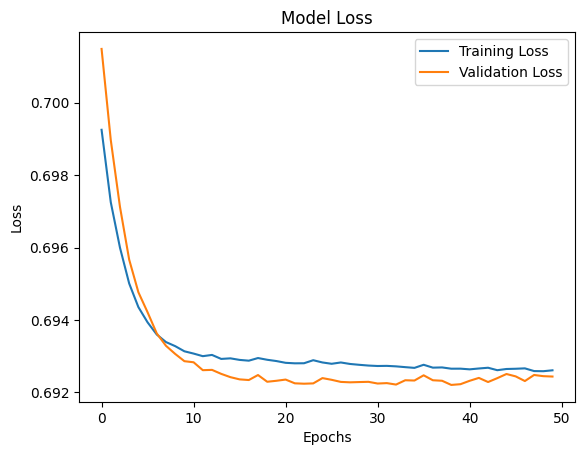

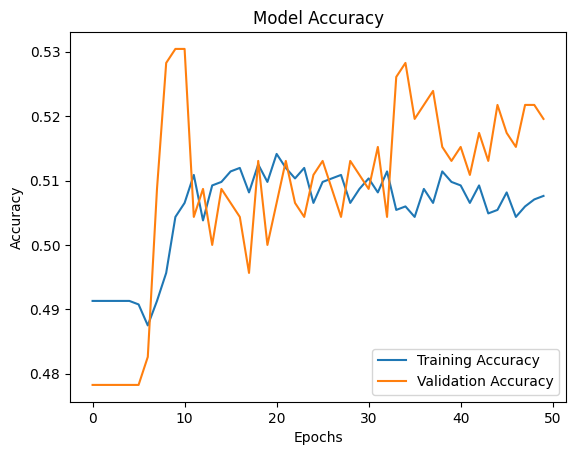

In [446]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Comparing the predicted results with real ones

In [447]:
# Predict probabilities for the test data
predicted_probs = model.predict(X_test)

# Convert probabilities to binary signals (1 = Buy, 0 = Don't Buy)
predicted_signals = (predicted_probs > 0.5).astype(int).flatten()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [448]:
# Extract the relevant dates and prices for the test set
test_dates = dataset.iloc[-len(y_test):].index
test_prices = dataset.iloc[-len(y_test):]['Close']

# Create a DataFrame to store predictions, actual signals, and prices
results = pd.DataFrame({
    'Date': test_dates,
    'Price': test_prices,
    'Predicted Signal': predicted_signals,
    'Actual Signal': y_test  # Optional: Include actual signals for comparison
})


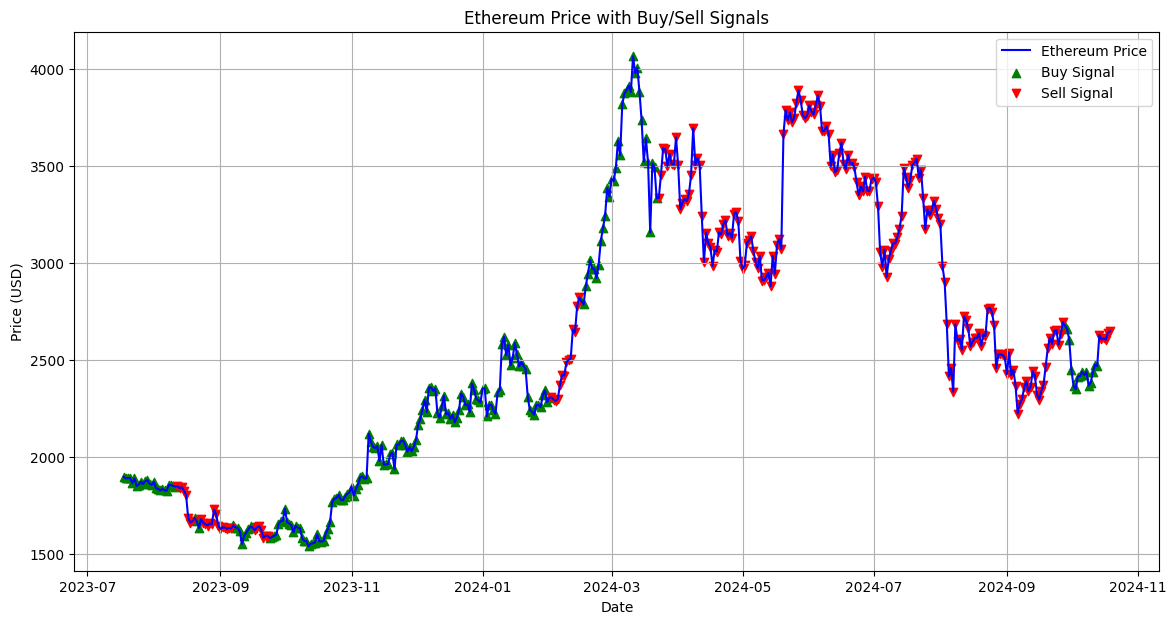

In [449]:
plt.figure(figsize=(14, 7))

# Plot Ethereum price
plt.plot(results['Date'], results['Price'], label='Ethereum Price', color='blue')

# Plot buy signals (green dots)
buy_signals = results[results['Predicted Signal'] == 1]
plt.scatter(buy_signals['Date'], buy_signals['Price'], color='green', label='Buy Signal', marker='^', alpha=1)

# Plot sell signals (red dots) if needed
sell_signals = results[results['Predicted Signal'] == 0]
plt.scatter(sell_signals['Date'], sell_signals['Price'], color='red', label='Sell Signal', marker='v', alpha=1)

plt.title('Ethereum Price with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [450]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
result = permutation_importance(rf, X_train, y_train, n_repeats=10, random_state=42)
print(result.importances_mean)

ValueError: Found array with dim 3. RandomForestClassifier expected <= 2.

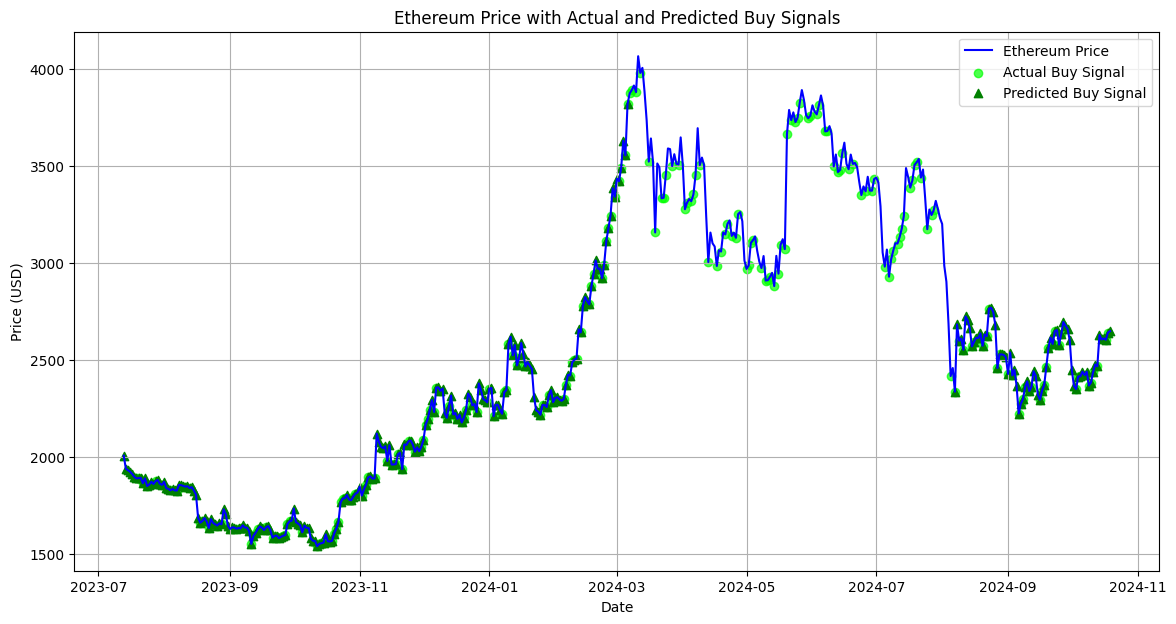

In [ ]:
plt.figure(figsize=(14, 7))

# Plot Ethereum price
plt.plot(results['Date'], results['Price'], label='Ethereum Price', color='blue')

# Actual buy signals (green dots)
actual_buy_signals = results[results['Actual Signal'] == 1]
plt.scatter(actual_buy_signals['Date'], actual_buy_signals['Price'], color='lime', label='Actual Buy Signal', marker='o', alpha=0.7)

# Predicted buy signals (green triangles)
predicted_buy_signals = results[results['Predicted Signal'] == 1]
plt.scatter(predicted_buy_signals['Date'], predicted_buy_signals['Price'], color='green', label='Predicted Buy Signal', marker='^', alpha=1)

plt.title('Ethereum Price with Actual and Predicted Buy Signals')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
dataset.value_counts('signal')

signal
1    1194
0    1142
Name: count, dtype: int64